In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Source of data = https://www.data.gouv.fr/fr/datasets/logement-encadrement-des-loyers/
data_1 = pd.read_csv("../datasets/logement-encadrement-des-loyers.csv", sep= ";")
# Source of data = https://opendata.paris.fr/explore/dataset/quartier_paris/information/?disjunctive.c_ar
data_2 = pd.read_csv("../datasets/quartier_paris.csv", sep= ";")
data_2.columns = ['N_SQ_QU', 'C_QU', 'C_QUINSEE', 'nom_quartier', 'C_AR', 'N_SQ_AR', 'PERIMETRE',
       'SURFACE', 'Geometry X Y', 'Geometry', 'st_area(shape)',
       'st_perimeter(shape)']
data = pd.merge(data_1, data_2, on= "nom_quartier")
data.drop(['N_SQ_QU', 'C_QU', 'C_QUINSEE', 'N_SQ_AR', 'PERIMETRE',
       'SURFACE', 'Geometry X Y', 'Geometry', 'st_area(shape)',
       'st_perimeter(shape)'], axis= 1, inplace= True)
df = data.copy()
df.drop(["geo_shape", "geo_point_2d"], axis= 1, inplace = True)
df.head()

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,C_AR
0,2021,10,49,Salpêtrière,2,Avant 1946,non meublé,24.9,29.88,17.43,PARIS,7511349,13
1,2022,10,49,Salpêtrière,4,Apres 1990,meublé,26.3,31.56,18.41,PARIS,7511349,13
2,2022,10,49,Salpêtrière,3,1946-1970,non meublé,21.6,25.92,15.12,PARIS,7511349,13
3,2022,10,49,Salpêtrière,1,Apres 1990,meublé,32.9,39.48,23.03,PARIS,7511349,13
4,2019,10,49,Salpêtrière,4,Avant 1946,meublé,23.7,28.40,16.60,PARIS,7511349,13


In [2]:
# Optimizing frequently used operations
def filter(data_frame,column,value):
    table = data_frame[data_frame[column] == value]
    return table
def melted_values(dataframe, id_vars, value_vars, value_name):
    melted_df = dataframe.melt(id_vars = id_vars, value_vars = value_vars, value_name = value_name)
    return melted_df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12160 entries, 0 to 12159
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annee                12160 non-null  int64  
 1   id_zone              12160 non-null  int64  
 2   id_quartier          12160 non-null  int64  
 3   nom_quartier         12160 non-null  object 
 4   piece                12160 non-null  int64  
 5   epoque               12160 non-null  object 
 6   meuble_txt           12160 non-null  object 
 7   ref                  12160 non-null  float64
 8   max                  12160 non-null  float64
 9   min                  12160 non-null  float64
 10  ville                12160 non-null  object 
 11  code_grand_quartier  12160 non-null  int64  
 12  C_AR                 12160 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

annee                  0
id_zone                0
id_quartier            0
nom_quartier           0
piece                  0
epoque                 0
meuble_txt             0
ref                    0
max                    0
min                    0
ville                  0
code_grand_quartier    0
C_AR                   0
dtype: int64

In [5]:
max_average_price = np.array(df["max"]).mean()
min_average_price = np.array(df["min"]).mean()
print(f"Average Max Price:{max_average_price : .2f}")
print(f"Average Min Price:{min_average_price : .2f}")

Average Max Price: 31.07
Average Min Price: 18.12


In [6]:
average_rent_price = df.groupby("annee")[["max", "min", "ref"]].mean()
average_rent_price

,max,min,ref
annee,,,
2019,30.371752,17.722451,25.308388
2020,30.775954,17.952640,25.646628
2021,31.086859,18.134001,25.905715
2022,31.365938,18.296797,26.138281
2023,31.733470,18.517064,26.444367


In [7]:
df_max = df.pivot_table(index= "C_AR", columns= "annee", values= "max", aggfunc= "max")
df_min = df.pivot_table(index= "C_AR", columns= "annee", values= "min", aggfunc= "min")
pd.concat([df_max, df_min], axis= 1)

annee,2019,2020,2021,2022,2023,2019,2020,2021,2022,2023
C_AR,,,,,,,,,,
1,43.9,44.40,44.64,45.12,45.6,13.9,14.07,14.00,14.28,14.6
2,43.9,44.40,44.64,45.12,45.6,15.0,15.05,15.33,15.54,15.7
3,41.5,42.12,42.48,43.20,43.9,15.0,15.05,15.33,15.61,15.8
4,43.9,44.40,44.64,45.12,45.6,15.0,15.05,15.33,15.54,15.7
5,41.5,42.12,42.48,43.20,43.9,14.1,14.42,14.14,14.28,14.7
6,47.2,47.52,47.04,47.16,47.8,15.1,15.19,15.40,15.54,15.7
7,47.2,47.52,47.04,47.16,47.8,16.0,16.73,17.22,17.08,17.3
8,43.9,44.40,44.64,45.12,45.6,15.1,15.19,15.40,15.54,15.7
9,43.9,44.40,44.64,45.12,45.6,13.9,14.07,14.00,14.28,14.6


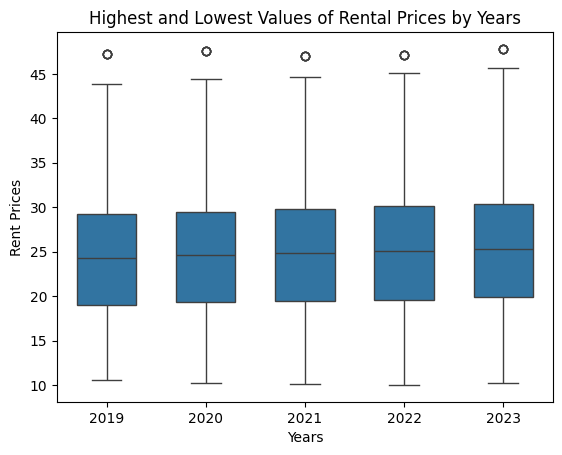

In [8]:
df_melted_years = melted_values(df, id_vars= "annee", value_vars= ("max","min", "ref"), value_name= "rent_prices")
sns.boxplot(x = "annee",
            y = "rent_prices",
            width= 0.6,
            data= df_melted_years)
plt.xlabel("Years")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by Years")
plt.show()

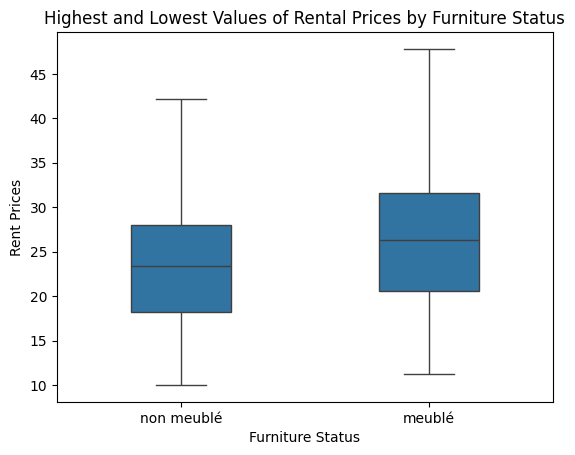

In [9]:
df_melted_furniture = melted_values(df, "meuble_txt", ("max", "min", "ref"), "rent_prices")
sns.boxplot(x = "meuble_txt",
            y = "rent_prices",
            width= 0.4,
            data = df_melted_furniture);
plt.xlabel("Furniture Status")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by Furniture Status")
plt.show()

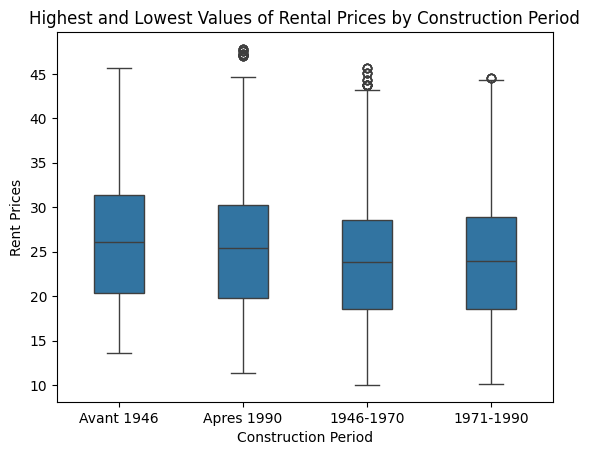

In [10]:
df_melted_furniture = melted_values(df, "epoque", ("max", "min", "ref"), "rent_prices")
sns.boxplot(x = "epoque",
            y = "rent_prices",
            width= 0.4,
            data = df_melted_furniture);
plt.xlabel("Construction Period")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by Construction Period")
plt.show()

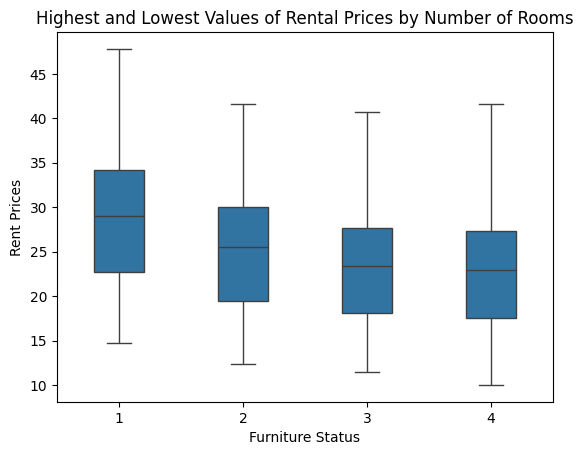

In [11]:
df_melted_furniture = melted_values(df, "piece", ("max", "min" ,"ref"), "rent_prices")
sns.boxplot(x = "piece",
            y = "rent_prices",
            width= 0.4,
            data = df_melted_furniture);
plt.xlabel("Furniture Status")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by Number of Rooms")
plt.show()

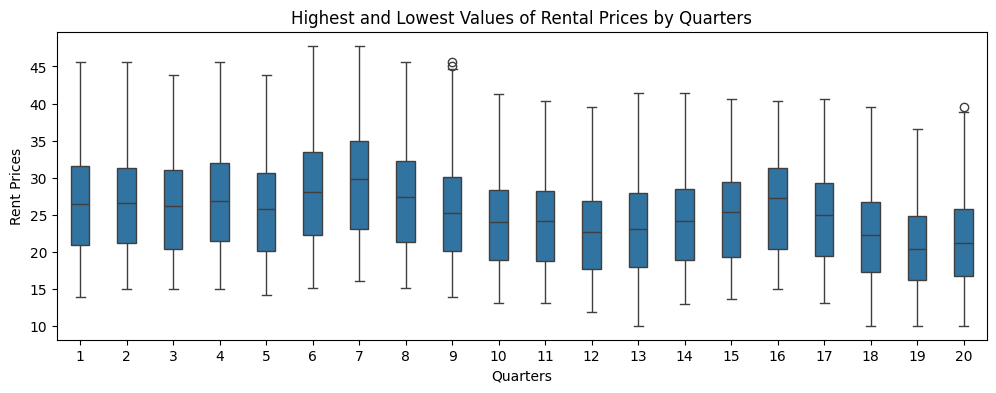

In [12]:
df_melted_AR = melted_values(df,"C_AR", ("max", "min" ,"ref"), value_name= "rent_prices")
plt.figure(figsize= (12,4))
sns.boxplot(x = "C_AR",
            y = "rent_prices",
            width= 0.4,
            data = df_melted_AR);
plt.xlabel("Quarters")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by Quarters")
plt.show()

In [13]:
df_7_arr = filter(df, "C_AR", 7)
df_19_arr = filter(df, "C_AR", 19)
df_13_arr = filter(df, "C_AR", 13)

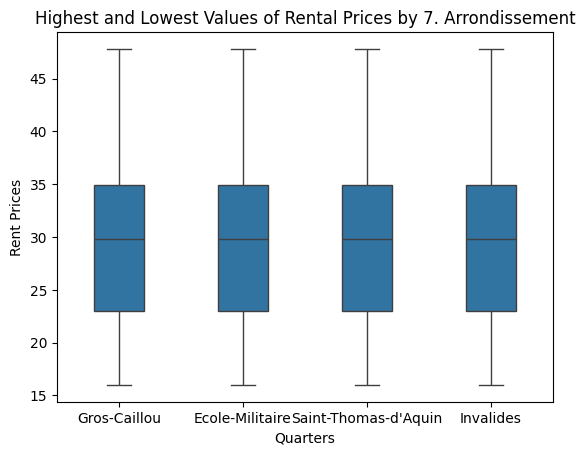

In [14]:
df_7_arr_melted = melted_values(df_7_arr, "nom_quartier", ("min","max", "ref"), "rent_prices")
sns.boxplot(x = "nom_quartier",
            y = "rent_prices",
            width= 0.4,
            data = df_7_arr_melted);
plt.xlabel("Quarters")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by 7. Arrondissement")
plt.show()

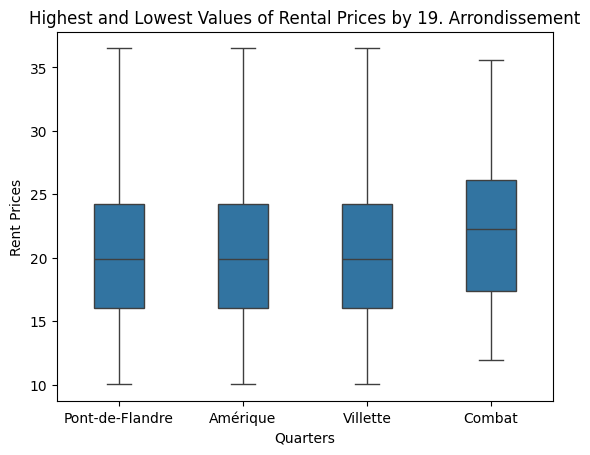

In [15]:
df_19_arr_melted = melted_values(df_19_arr, "nom_quartier", ("min","max", "ref"), "rent_prices")
sns.boxplot(x = "nom_quartier",
            y = "rent_prices",
            width= 0.4,
            data = df_19_arr_melted);
plt.xlabel("Quarters")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by 19. Arrondissement")
plt.show()

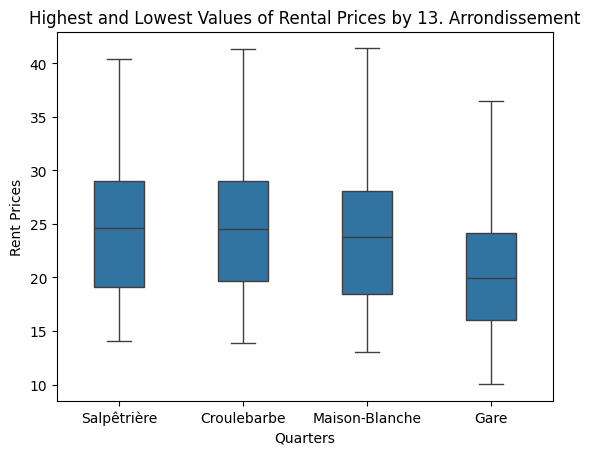

In [16]:
df_13_arr_melted = melted_values(df_13_arr, "nom_quartier", ("min","max", "ref"), "rent_prices")
sns.boxplot(x = "nom_quartier",
            y = "rent_prices",
            width= 0.4,
            data = df_13_arr_melted);
plt.xlabel("Quarters")
plt.ylabel("Rent Prices")
plt.title("Highest and Lowest Values of Rental Prices by 13. Arrondissement")
plt.show()

## Modeling Estimate Rent Prices in the Future

In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [18]:
y_max = df["max"]
y_min = df["min"]
X = df["C_AR"]

In [19]:
const = sm.add_constant(X)
model_max = sm.OLS(y_max, const).fit()
model_min = sm.OLS(y_min, const).fit()

In [20]:
model_max.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    max   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2428.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:22:58   Log-Likelihood:                -35923.
No. Observations:               12160   AIC:                         7.185e+04
Df Residuals:                   12158   BIC:                         7.186e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9699      0.090    389.828      0.000      34.794      35.146
C_AR          -0.3640      0.007    -49.275      0.000      -0.378      -0.349
==============================================================================
Omnibus:                      228.837   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.455
Skew:                           0.319   Prob(JB):                     5.50e-51
Kurtosis:                       2.775   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    min   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2427.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:22:58   Log-Likelihood:                -29368.
No. Observations:               12160   AIC:                         5.874e+04
Df Residuals:                   12158   BIC:                         5.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4008      0.052    389.868      0.000      20.298      20.503
C_AR          -0.2123      0.004    -49.262      0.000      -0.221      -0.204
==============================================================================
Omnibus:                      229.362   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.966
Skew:                           0.319   Prob(JB):                     4.26e-51
Kurtosis:                       2.774   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lr_max = LinearRegression()
lr_max.fit(X.values.reshape(-1,1),y_max.values.reshape(-1,1))

LinearRegression()

In [23]:
print(lr_max.coef_, lr_max.intercept_)

[[-0.3639727]] [34.96992274]


In [24]:
predicted_max = lr_max.predict(X.values.reshape(-1,1))
predicted_max = pd.DataFrame(predicted_max)
predicted_max


,0
0,30.238278
1,30.238278
2,30.238278
3,30.238278
4,30.238278
...,...
12155,32.058141
12156,32.058141
12157,32.058141
12158,32.058141


In [25]:
lr_min = LinearRegression()
lr_min.fit(X.values.reshape(-1,1), y_min)

LinearRegression()

In [26]:
print(lr_min.coef_, lr_min.intercept_)

[-0.21225679] 20.400765272049252


In [27]:
predicted_min = lr_min.predict(X.values.reshape(-1,1))
predicted_min = pd.DataFrame(predicted_min)
predicted_min

,0
0,17.641427
1,17.641427
2,17.641427
3,17.641427
4,17.641427
...,...
12155,18.702711
12156,18.702711
12157,18.702711
12158,18.702711


In [28]:
predicted_df = pd.concat([predicted_max,predicted_min], axis= 1)
predicted_df["nom_quartier"] = df["nom_quartier"]
predicted_df.columns = ["max", "min", "nom_quartier"]
predicted_df

,max,min,nom_quartier
0,30.238278,17.641427,Salpêtrière
1,30.238278,17.641427,Salpêtrière
2,30.238278,17.641427,Salpêtrière
3,30.238278,17.641427,Salpêtrière
4,30.238278,17.641427,Salpêtrière
...,...,...,...
12155,32.058141,18.702711,Faubourg-du-Roule
12156,32.058141,18.702711,Faubourg-du-Roule
12157,32.058141,18.702711,Faubourg-du-Roule
12158,32.058141,18.702711,Faubourg-du-Roule
